#### Forecasting Timeseries Data Using Facebook FbProphet

Steps Required With Prophet
1. Introduction
2. Data Preprocessing With Time Seires
3. Model Fitting
4. Obtaining The Forecasts
5. Plotting The Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance Metrics


In [45]:
import pandas as pd

from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [46]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/monthly-milk-production-pounds.csv
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/monthly-milk-production-pounds.csv'

In [47]:
df=pd.read_csv(path)
df

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [48]:
df.drop(168,axis=0,inplace=True)

In [49]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [50]:
df.columns=["ds","y"]
df

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0


<Axes: >

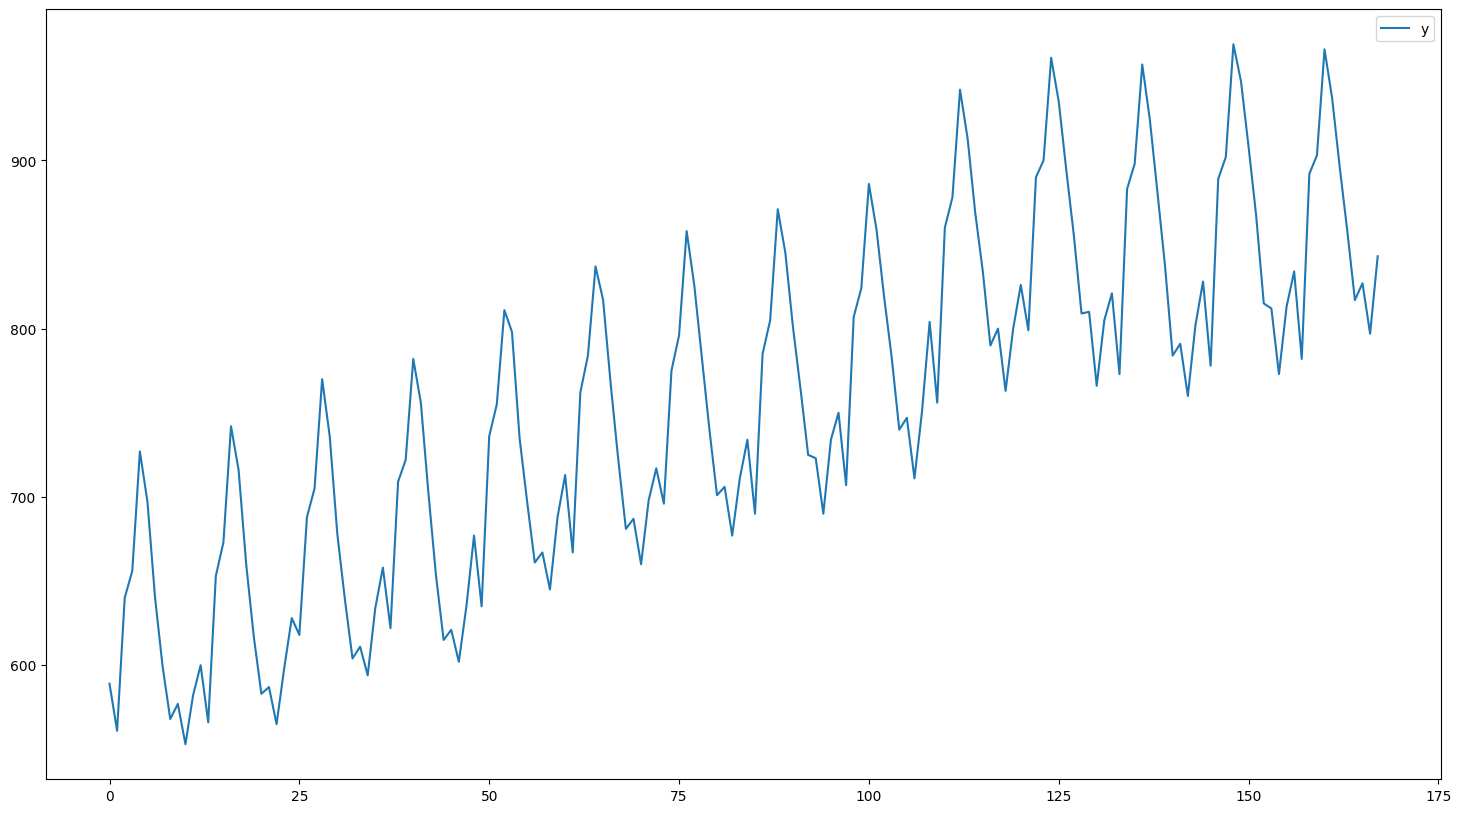

In [51]:
df.plot(figsize=(18,10))

In [52]:
df

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0


In [53]:
df['ds']=pd.to_datetime(df['ds'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      168 non-null    datetime64[ns]
 1   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


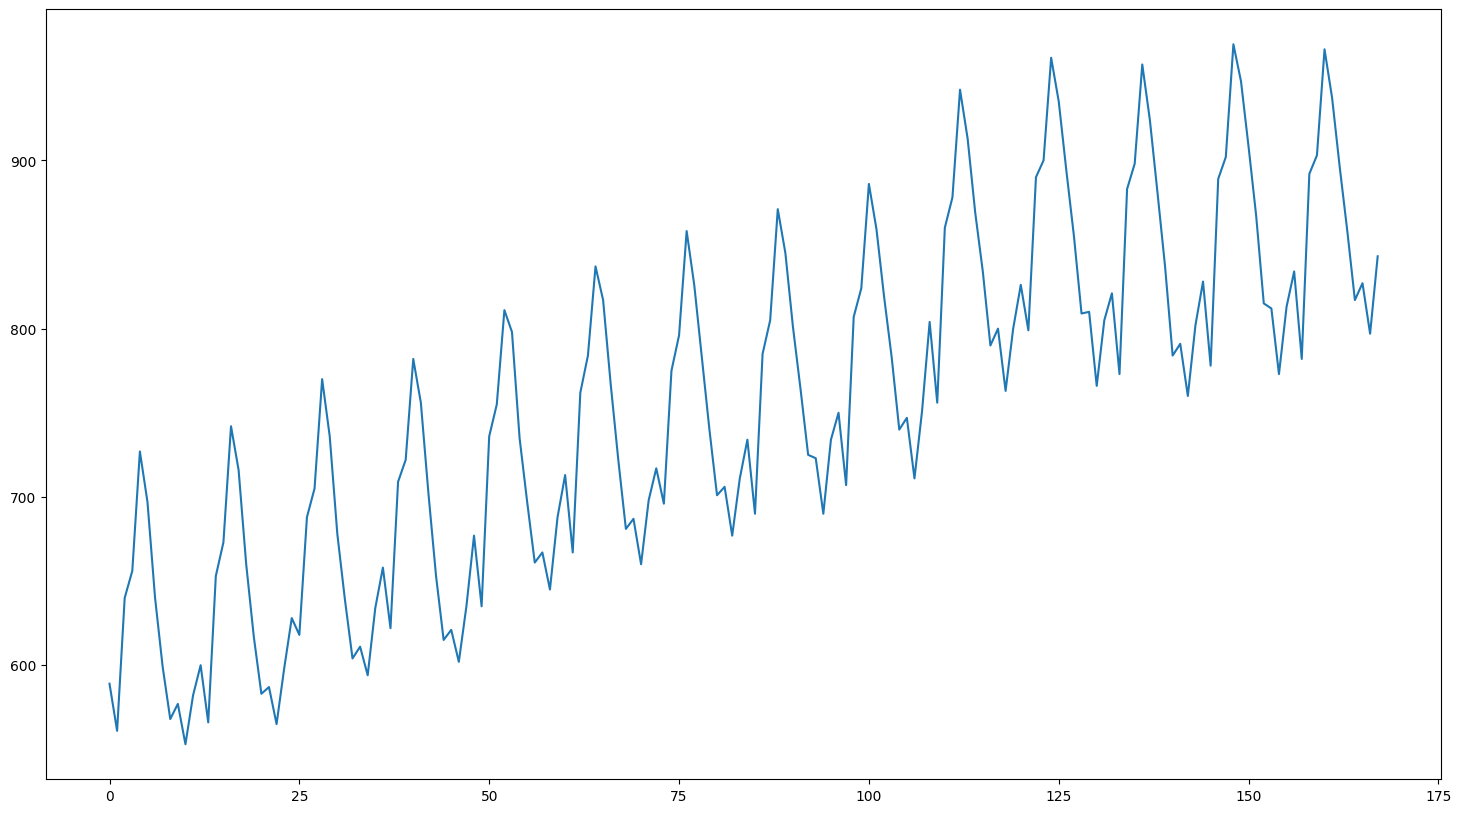

In [55]:
df['y'].plot(figsize=(18,10));

In [56]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [57]:
### intiialize the Model
m=Prophet()
model = m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/4765pmox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/xoxzice0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37180', 'data', 'file=/tmp/tmp_esn52zl/4765pmox.json', 'init=/tmp/tmp_esn52zl/xoxzice0.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modeluob385ex/prophet_model-20250130131004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
model

In [59]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [60]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [61]:
#### Create future dates of 365 days
future = model.make_future_dataframe(periods=24,freq='MS')

In [62]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [63]:
168+24

192

In [64]:
future

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
187,1977-08-01
188,1977-09-01
189,1977-10-01
190,1977-11-01


In [65]:
### Prediction
forecast = model.predict(future)

In [66]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.955437,577.200308,596.581220,606.955437,606.955437,-20.137031,-20.137031,-20.137031,-20.137031,-20.137031,-20.137031,0.0,0.0,0.0,586.818406
1,1962-02-01,608.670887,535.826453,555.805252,608.670887,608.670887,-62.555086,-62.555086,-62.555086,-62.555086,-62.555086,-62.555086,0.0,0.0,0.0,546.115802
2,1962-03-01,610.220326,631.893064,651.315581,610.220326,610.220326,31.391552,31.391552,31.391552,31.391552,31.391552,31.391552,0.0,0.0,0.0,641.611878
3,1962-04-01,611.935777,648.976645,667.920216,611.935777,611.935777,46.719774,46.719774,46.719774,46.719774,46.719774,46.719774,0.0,0.0,0.0,658.655551
4,1962-05-01,613.595890,712.005003,732.095845,613.595890,613.595890,108.057725,108.057725,108.057725,108.057725,108.057725,108.057725,0.0,0.0,0.0,721.653615


In [67]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
187,1977-08-01,867.419852,852.698534,882.111046
188,1977-09-01,825.726337,810.359271,841.504439
189,1977-10-01,829.748833,814.763091,845.937328
190,1977-11-01,799.958832,783.137007,816.423701
191,1977-12-01,837.765871,822.047696,855.472898


In [68]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.818406,577.200308,596.581220
1,1962-02-01,546.115802,535.826453,555.805252
2,1962-03-01,641.611878,631.893064,651.315581
3,1962-04-01,658.655551,648.976645,667.920216
4,1962-05-01,721.653615,712.005003,732.095845


#### Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

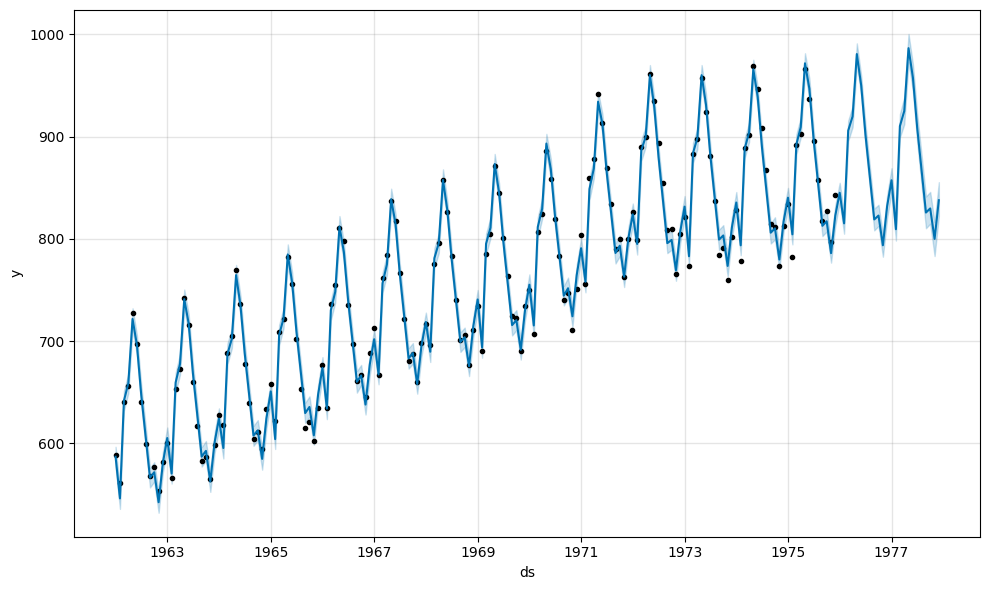

In [69]:
#### plot the predicted projection
model.plot(forecast);

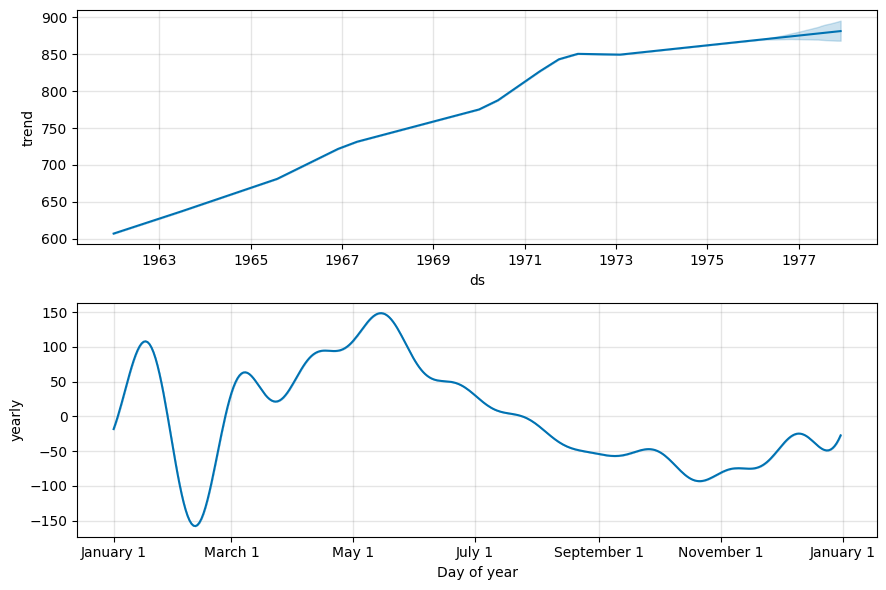

In [70]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(forecast);

In [71]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

df_merge = pd.merge(df, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
163,1975-08-01,844.991569,865.158093,855.271691,858.0
164,1975-09-01,802.701025,822.860711,812.770518,817.0
165,1975-10-01,807.242031,827.104586,817.217973,827.0
166,1975-11-01,776.719473,796.390983,785.990241,797.0
167,1975-12-01,812.824579,833.103376,822.804103,843.0


In [72]:
# calculate MAE between observed and predicted values
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values

mae_01 = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae_01)

mse_01 = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse_01)

mape_01 = mean_absolute_percentage_error(y_true, y_pred)
print(f'MAPE: %.3f' % mape_01)

MAE: 5.928
MSE: 59.813
MAPE: 0.008


#### Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [73]:
df.shape

(168, 2)

cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

- shift from 180 days

Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 730 days of training data in the first cutoff and then making predictions every 180 days. On this 8 year time series, this corresponds to 11 total forecasts.

#### Cross Validation
https://facebook.github.io/prophet/docs/diagnostics.html

<img src="https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_4_0.png" width="800">


- Il numero totale di observation sono 700 giorni
- Initial 48 mesi
- period 12 giorni
- horizon 24 giorni

Nella prima iterazione si traina dal 1-48 mesi e fa il forecast dei 24 mesi, 48+24=72.

Poi shifta di 12 mesi in avanti (period) e nella seconda iterazione si traina dal 11-375  e fa il forecast dei 20 giorni dal 376 al 395, etc.

In [74]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model,
                        horizon=pd.to_timedelta(30*24,unit="D"), # forecast
                        period=pd.to_timedelta(30*12,unit="D"), #shift mobile
                        initial=pd.to_timedelta(30*48,unit="D"), # past iniziale
                        #parallel="dask"#need to install dask
                        )

INFO:prophet:Making 9 forecasts with cutoffs between 1966-01-22 00:00:00 and 1973-12-11 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/c_xw3y4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/uycunc9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24643', 'data', 'file=/tmp/tmp_esn52zl/c_xw3y4q.json', 'init=/tmp/tmp_esn52zl/uycunc9m.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelqpcprx7a/prophet_model-20250130131006.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/gpp66psi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/ixldp37e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [75]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1966-02-01,631.987184,626.853329,637.085707,635.0,1966-01-22
1,1966-03-01,714.052665,709.208765,718.718091,736.0,1966-01-22
2,1966-04-01,729.616122,724.856119,734.633151,755.0,1966-01-22
3,1966-05-01,795.638423,790.510528,800.390721,811.0,1966-01-22
4,1966-06-01,766.303672,761.197261,771.421108,798.0,1966-01-22
...,...,...,...,...,...,...
209,1975-08-01,841.779891,824.484609,858.632393,858.0,1973-12-11
210,1975-09-01,800.892042,782.584645,820.136645,817.0,1973-12-11
211,1975-10-01,805.234418,785.481566,823.728084,827.0,1973-12-11
212,1975-11-01,774.223367,753.287480,794.028899,797.0,1973-12-11


#### Obtaining the Performance Metrics

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [76]:
from prophet.diagnostics import performance_metrics

df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,70 days,420.940747,20.516841,16.067948,0.020839,0.014845,0.020741,0.285714
1,74 days,382.489029,19.557327,15.003500,0.019526,0.012563,0.019393,0.285714
2,75 days,436.330291,20.888521,16.363009,0.021018,0.014845,0.020852,0.238095
3,80 days,408.031651,20.199793,15.348545,0.019406,0.012563,0.019273,0.285714
4,85 days,322.703477,17.963949,13.606049,0.017291,0.011543,0.017219,0.285714
...,...,...,...,...,...,...,...,...
170,705 days,2275.492228,47.702120,38.429449,0.050830,0.048282,0.049860,0.285714
171,709 days,2327.047918,48.239485,39.430181,0.052267,0.048755,0.051348,0.285714
172,710 days,2582.764272,50.820904,41.307333,0.054600,0.048755,0.053321,0.285714
173,715 days,3061.745106,55.333038,45.550204,0.059785,0.050581,0.057925,0.285714


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


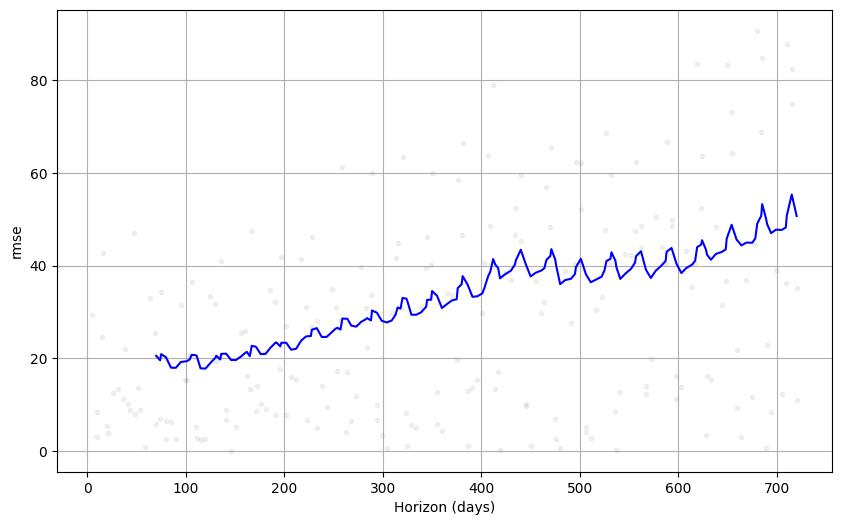

In [77]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


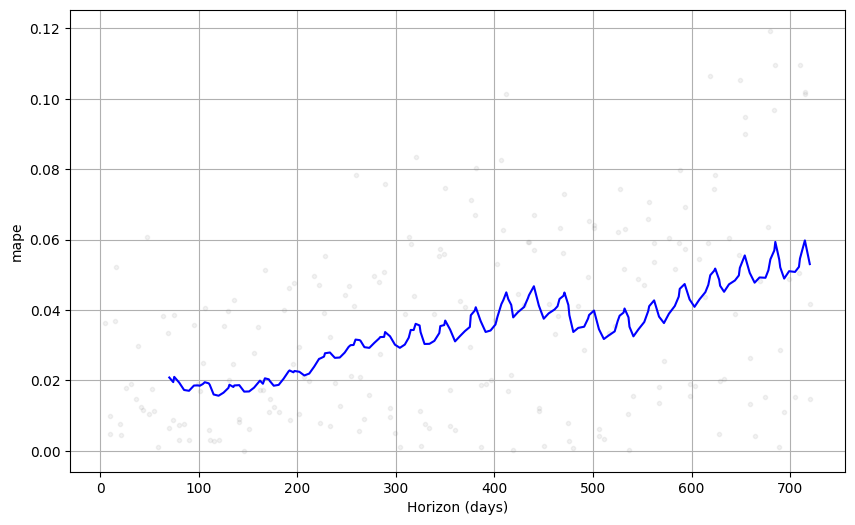

In [78]:
fig=plot_cross_validation_metric(df_cv,metric='mape')

In [79]:
df_performance.mean()

,0
horizon,390 days 01:55:12
mse,1216.4409
rmse,33.574071
mae,27.843102
mape,0.034759
mdape,0.034037
smape,0.034459
coverage,0.252653


I struggled with this for a while as well. But here is how it works. The initial model will be trained on the first 1,825 days of data. It will forecast the next 60 days of data (because horizon is set to 60). The model will then train on the initial period + the period (1,825 + 30 days in this case) and forecast the next 60 days. It will continued like this, adding another 30 days to the training data and then forecasting for the next 60 until there is no longer enough data to do this.

In summary, period is how much data to add to the training data set in every iteration of cross-validation, and horizon is how far out it will forecast.

## Hyperparameter tuning


Cross-validation can be used for tuning hyperparameters of the model, such as changepoint_prior_scale and seasonality_prior_scale. A Python example is given below, with a 4x4 grid of those two parameters, with parallelization over cutoffs. Here parameters are evaluated on RMSE averaged over a 365-day horizon, but different performance metrics may be appropriate for different problems.

In [80]:
# Python
import itertools
import numpy as np
import pandas as pd

#'changepoint_range': [0.6, 0.7, 0.75, 0.8, 0.9],
#'holidays_prior_scale':[1.0, 5.0, 10.0, 15.0],
#'yearly_seasonality':[5, 10, 15, 20],
#'weekly_seasonality':[5, 10, 15, 20],


param_grid = {
            'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
            'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
            }

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here


# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(model,
                            horizon=pd.to_timedelta(30*24,unit="D"), # forecast
                            period=pd.to_timedelta(30*12,unit="D"), #shift mobile
                            initial=pd.to_timedelta(30*48,unit="D"), # past iniziale
                             )


    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/jn133oob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/nep3x_jb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36314', 'data', 'file=/tmp/tmp_esn52zl/jn133oob.json', 'init=/tmp/tmp_esn52zl/nep3x_jb.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_model_x4d84fk/prophet_model-20250130131010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
13:10:10 - cmdstanpy - ERROR - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/2da4_o20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/228zeky6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86814', 'data', 'file=/tmp/tmp_esn52zl/2da4_o20.json', 'init=/tmp/tmp_esn52zl/228zeky6.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelembbek0a/prophet_model-20250130131011.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/t8qjzyp2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/2c7dozi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/hyb4kb20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/_4031cjz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96373', 'data', 'file=/tmp/tmp_esn52zl/hyb4kb20.json', 'init=/tmp/tmp_esn52zl/_4031cjz.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelq6re9428/prophet_model-20250130131016.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/4lze9nvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/qq_4kec4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/kxcya54l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/3gwdmbi7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7525', 'data', 'file=/tmp/tmp_esn52zl/kxcya54l.json', 'init=/tmp/tmp_esn52zl/3gwdmbi7.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelbcvd3c4s/prophet_model-20250130131020.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/x8t253gi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/izkvpnnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/hn_3zqpw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/67e2k4fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44772', 'data', 'file=/tmp/tmp_esn52zl/hn_3zqpw.json', 'init=/tmp/tmp_esn52zl/67e2k4fn.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelz0n3cx1i/prophet_model-20250130131025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/i_326m57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/0sldget1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/4m5j1tku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/zgsuf7wq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93407', 'data', 'file=/tmp/tmp_esn52zl/4m5j1tku.json', 'init=/tmp/tmp_esn52zl/zgsuf7wq.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelth3zpflm/prophet_model-20250130131030.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/4xz60s37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/l7abbt01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/b1shiqth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/x5rxqor9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61215', 'data', 'file=/tmp/tmp_esn52zl/b1shiqth.json', 'init=/tmp/tmp_esn52zl/x5rxqor9.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_model88tk9adj/prophet_model-20250130131033.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/9scs2n0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/3ory4730.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/gk7t2e6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/l6eb6_zs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43091', 'data', 'file=/tmp/tmp_esn52zl/gk7t2e6m.json', 'init=/tmp/tmp_esn52zl/l6eb6_zs.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelucedo1m4/prophet_model-20250130131036.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/fr18zn57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/8cnald2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/n_61dl2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/zvc3efyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73349', 'data', 'file=/tmp/tmp_esn52zl/n_61dl2a.json', 'init=/tmp/tmp_esn52zl/zvc3efyt.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_model8kvh9zyk/prophet_model-20250130131039.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/s5dxylb6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/7g837dnt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/jdznb2al.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/gldgsv7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88947', 'data', 'file=/tmp/tmp_esn52zl/jdznb2al.json', 'init=/tmp/tmp_esn52zl/gldgsv7d.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_model86y_n5wa/prophet_model-20250130131044.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/xo1eyqdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/6fc6n0we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/3066lz6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/cguz82h6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15826', 'data', 'file=/tmp/tmp_esn52zl/3066lz6b.json', 'init=/tmp/tmp_esn52zl/cguz82h6.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelg4l_9h0n/prophet_model-20250130131047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/m_ytnml7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/fon5oxl2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/w3srg0a1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/j4cpij8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67219', 'data', 'file=/tmp/tmp_esn52zl/w3srg0a1.json', 'init=/tmp/tmp_esn52zl/j4cpij8k.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_model8rpc6gmt/prophet_model-20250130131050.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/7ga9p8vm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/nmlw6l_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/daandvhe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/4sjyb6tv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21702', 'data', 'file=/tmp/tmp_esn52zl/daandvhe.json', 'init=/tmp/tmp_esn52zl/4sjyb6tv.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelv68flmv2/prophet_model-20250130131055.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/ghp2mtn_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/y0xrynih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/i1raa0ag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/jvnhlowo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45868', 'data', 'file=/tmp/tmp_esn52zl/i1raa0ag.json', 'init=/tmp/tmp_esn52zl/jvnhlowo.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelvm2432v5/prophet_model-20250130131059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/upf2iubq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/31jaj65y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/qf2t2teo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/coia54oa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58823', 'data', 'file=/tmp/tmp_esn52zl/qf2t2teo.json', 'init=/tmp/tmp_esn52zl/coia54oa.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelz_udzkq9/prophet_model-20250130131102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/qg6cq4yn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/uul94tpf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/h8w0g2f1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/s9t8fw6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15877', 'data', 'file=/tmp/tmp_esn52zl/h8w0g2f1.json', 'init=/tmp/tmp_esn52zl/s9t8fw6u.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_model0jijhu69/prophet_model-20250130131106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/ri4j_68y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/2bekj8vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/__qqjqki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/bp1o6jcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66268', 'data', 'file=/tmp/tmp_esn52zl/__qqjqki.json', 'init=/tmp/tmp_esn52zl/bp1o6jcz.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modeluqqajq1k/prophet_model-20250130131110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/cfvq3vi0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/tfx65tg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  23.411772
1                     0.001                     0.10  22.381403
2                     0.001                     1.00  22.506897
3                     0.001                    10.00  22.444466
4                     0.010                     0.01  29.227555
5                     0.010                     0.10  29.430984
6                     0.010                     1.00  29.512212
7                     0.010                    10.00  29.846516
8                     0.100                     0.01  35.707942
9                     0.100                     0.10  36.026118
10                    0.100                     1.00  35.928120
11                    0.100                    10.00  35.970110
12                    0.500                     0.01  37.120845
13                    0.500                     0.10  35.284954
14                    0.500             

In [81]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}


In [82]:
# model = Prophet(changepoint_prior_scale=0.5,
#                     seasonality_prior_scale=2,
#                     seasonality_mode='multiplicative',
#                     changepoint_range=0.8,
#                     #holidays_prior_scale= 1,
#                     #seasonality_mode='additive',
#                     #growth='logistic',
#                     yearly_seasonality= 10
#                     )

In [83]:
model_tuned = Prophet(changepoint_prior_scale=0.001,
                      seasonality_prior_scale=0.1,
                     )

In [84]:
model_tuned.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/ybckcl6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/8u6fmsnt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24919', 'data', 'file=/tmp/tmp_esn52zl/ybckcl6q.json', 'init=/tmp/tmp_esn52zl/8u6fmsnt.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelficoykt6/prophet_model-20250130131113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
13:11:13 - cmdstanpy - ERROR - Chain [1]

In [85]:
df_cv_final=cross_validation(model_tuned,
                            horizon=pd.to_timedelta(30*24,unit="D"), # forecast
                            period=pd.to_timedelta(30*12,unit="D"), #shift mobile
                            initial=pd.to_timedelta(30*48,unit="D"), # past iniziale
                            #parallel="dask"#need to install dask
                            )

INFO:prophet:Making 9 forecasts with cutoffs between 1966-01-22 00:00:00 and 1973-12-11 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/ht__8w5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/py82zixx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4184', 'data', 'file=/tmp/tmp_esn52zl/ht__8w5y.json', 'init=/tmp/tmp_esn52zl/py82zixx.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelo_4nx_6l/prophet_model-20250130131114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/slo1_986.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/w1piw7m9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [86]:
df_performance=performance_metrics(df_cv_final)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,70 days,510.207907,22.587782,19.789423,0.025193,0.027791,0.025164,0.380952
1,74 days,496.055219,22.272297,19.402298,0.024733,0.022370,0.024693,0.380952
2,75 days,472.245517,21.731211,19.110700,0.024280,0.021167,0.024208,0.333333
3,80 days,458.213339,21.405918,19.032918,0.023990,0.022370,0.023879,0.285714
4,85 days,444.239691,21.076994,18.669512,0.023565,0.021167,0.023464,0.285714
...,...,...,...,...,...,...,...,...
170,705 days,495.058099,22.249901,18.175007,0.023742,0.021299,0.023525,0.285714
171,709 days,496.859084,22.290336,18.303279,0.023936,0.021299,0.023723,0.238095
172,710 days,458.060820,21.402355,16.946892,0.022240,0.019085,0.021997,0.285714
173,715 days,545.542460,23.356850,18.412950,0.024000,0.021299,0.023645,0.285714


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


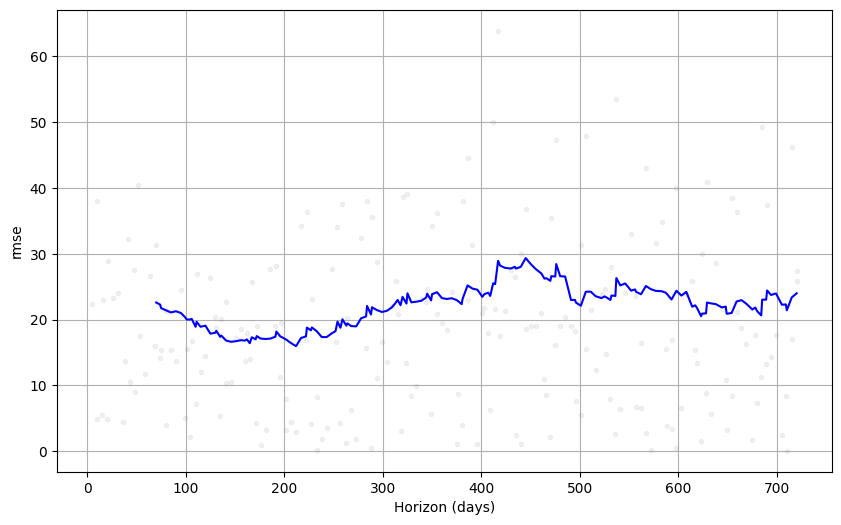

In [87]:
fig=plot_cross_validation_metric(df_cv_final,metric='rmse')

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


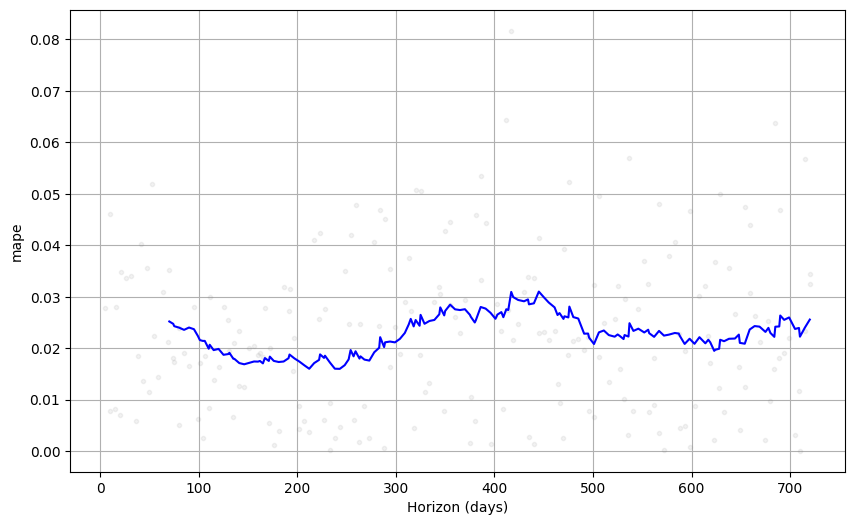

In [88]:
fig=plot_cross_validation_metric(df_cv_final,metric='mape')

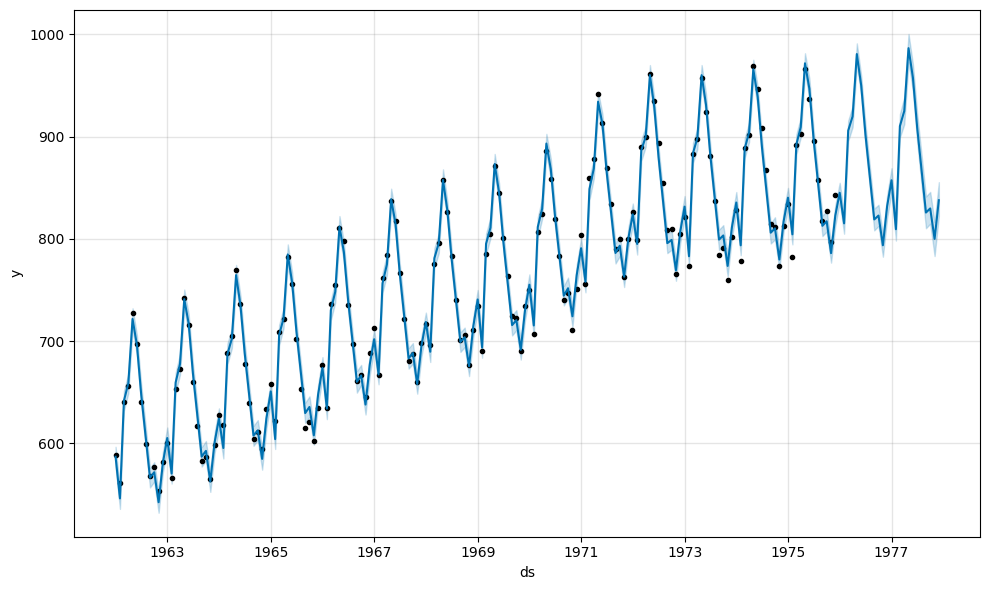

In [89]:
plot1 = model_tuned.plot(forecast)

In [90]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model_tuned, forecast)
fig.update_layout(
                  yaxis_title="Milk Production",
                  xaxis_title="Data",
                  title="Milk Production",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

### The Prophet model has a number of input parameters that one might consider tuning. Here are some general recommendations for hyperparameter tuning that may be a good starting place.

Parameters that can be tuned

changepoint_prior_scale: This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. As described in this documentation, if it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right. Parameters like this (regularization penalties; this is effectively a lasso penalty) are often tuned on a log scale.

seasonality_prior_scale: This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10., which applies basically no regularization. That is because we very rarely see overfitting here (there’s inherent regularization with the fact that it is being modeled with a truncated Fourier series, so it’s essentially low-pass filtered). A reasonable range for tuning it would probably be [0.01, 10]; when set to 0.01 you should find that the magnitude of seasonality is forced to be very small. This likely also makes sense on a log scale, since it is effectively an L2 penalty like in ridge regression.

holidays_prior_scale: This controls flexibility to fit holiday effects. Similar to seasonality_prior_scale, it defaults to 10.0 which applies basically no regularization, since we usually have multiple observations of holidays and can do a good job of estimating their effects. This could also be tuned on a range of [0.01, 10] as with seasonality_prior_scale.

seasonality_mode: Options are ['additive', 'multiplicative']. Default is 'additive', but many business time series will have multiplicative seasonality. This is best identified just from looking at the time series and seeing if the magnitude of seasonal fluctuations grows with the magnitude of the time series (see the documentation here on multiplicative seasonality), but when that isn’t possible, it could be tuned.

Maybe tune?

changepoint_range: This is the proportion of the history in which the trend is allowed to change. This defaults to 0.8, 80% of the history, meaning the model will not fit any trend changes in the last 20% of the time series. This is fairly conservative, to avoid overfitting to trend changes at the very end of the time series where there isn’t enough runway left to fit it well. With a human in the loop, this is something that can be identified pretty easily visually: one can pretty clearly see if the forecast is doing a bad job in the last 20%. In a fully-automated setting, it may be beneficial to be less conservative. It likely will not be possible to tune this parameter effectively with cross validation over cutoffs as described above. The ability of the model to generalize from a trend change in the last 10% of the time series will be hard to learn from looking at earlier cutoffs that may not have trend changes in the last 10%. So, this parameter is probably better not tuned, except perhaps over a large number of time series. In that setting, [0.8, 0.95] may be a reasonable range.
Parameters that would likely not be tuned

growth: Options are ‘linear’ and ‘logistic’. This likely will not be tuned; if there is a known saturating point and growth towards that point it will be included and the logistic trend will be used, otherwise it will be linear.

changepoints: This is for manually specifying the locations of changepoints. None by default, which automatically places them.

n_changepoints: This is the number of automatically placed changepoints. The default of 25 should be plenty to capture the trend changes in a typical time series (at least the type that Prophet would work well on anyway). Rather than increasing or decreasing the number of changepoints, it will likely be more effective to focus on increasing or decreasing the flexibility at those trend changes, which is done with changepoint_prior_scale.

yearly_seasonality: By default (‘auto’) this will turn yearly seasonality on if there is a year of data, and off otherwise. Options are [‘auto’, True, False]. If there is more than a year of data, rather than trying to turn this off during HPO, it will likely be more effective to leave it on and turn down seasonal effects by tuning seasonality_prior_scale.

weekly_seasonality: Same as for yearly_seasonality.

daily_seasonality: Same as for yearly_seasonality.

holidays: This is to pass in a dataframe of specified holidays. The holiday effects would be tuned with holidays_prior_scale.

mcmc_samples: Whether or not MCMC is used will likely be determined by factors like the length of the time series and the importance of parameter uncertainty (these considerations are described in the documentation).

interval_width: Prophet predict returns uncertainty intervals for each component, like yhat_lower and yhat_upper for the forecast yhat. These are computed as quantiles of the posterior predictive distribution, and interval_width specifies which quantiles to use. The default of 0.8 provides an 80% prediction interval. You could change that to 0.95 if you wanted a 95% interval. This will affect only the uncertainty interval, and will not change the forecast yhat at all and so does not need to be tuned.

uncertainty_samples: The uncertainty intervals are computed as quantiles from the posterior predictive interval, and the posterior predictive interval is estimated with Monte Carlo sampling. This parameter is the number of samples to use (defaults to 1000). The running time for predict will be linear in this number. Making it smaller will increase the variance (Monte Carlo error) of the uncertainty interval, and making it larger will reduce that variance. So, if the uncertainty estimates seem jagged this could be increased to further smooth them out, but it likely will not need to be changed. As with interval_width, this parameter only affects the uncertainty intervals and changing it will not affect in any way the forecast yhat; it does not need to be tuned.

stan_backend: If both pystan and cmdstanpy backends set up, the backend can be specified. The predictions will be the same, this will not be tuned.

In [91]:
import requests

response = requests.get(
                        "https://api.electricitymap.org/v3/carbon-intensity/history?zone=IT",
                        headers={
                            "auth-token": f"yfkDAZAIciYHTUtZ902a"
                        })

print(response.json())

{'zone': 'IT', 'history': [{'zone': 'IT', 'carbonIntensity': 350, 'datetime': '2025-01-29T14:00:00.000Z', 'updatedAt': '2025-01-30T09:44:23.253Z', 'createdAt': '2025-01-26T14:43:51.483Z', 'emissionFactorType': 'lifecycle', 'isEstimated': True, 'estimationMethod': 'TIME_SLICER_AVERAGE'}, {'zone': 'IT', 'carbonIntensity': 354, 'datetime': '2025-01-29T15:00:00.000Z', 'updatedAt': '2025-01-30T09:44:23.253Z', 'createdAt': '2025-01-26T15:43:07.212Z', 'emissionFactorType': 'lifecycle', 'isEstimated': False, 'estimationMethod': None}, {'zone': 'IT', 'carbonIntensity': 355, 'datetime': '2025-01-29T16:00:00.000Z', 'updatedAt': '2025-01-30T11:44:01.136Z', 'createdAt': '2025-01-26T16:41:44.589Z', 'emissionFactorType': 'lifecycle', 'isEstimated': True, 'estimationMethod': 'TIME_SLICER_AVERAGE'}, {'zone': 'IT', 'carbonIntensity': 357, 'datetime': '2025-01-29T17:00:00.000Z', 'updatedAt': '2025-01-30T11:43:36.582Z', 'createdAt': '2025-01-26T17:43:03.332Z', 'emissionFactorType': 'lifecycle', 'isEstimat

In [92]:
import pandas as pd

df = pd.json_normalize(response.json()['history'])
df

,zone,carbonIntensity,datetime,updatedAt,createdAt,emissionFactorType,isEstimated,estimationMethod
0,IT,350,2025-01-29T14:00:00.000Z,2025-01-30T09:44:23.253Z,2025-01-26T14:43:51.483Z,lifecycle,True,TIME_SLICER_AVERAGE
1,IT,354,2025-01-29T15:00:00.000Z,2025-01-30T09:44:23.253Z,2025-01-26T15:43:07.212Z,lifecycle,False,None
2,IT,355,2025-01-29T16:00:00.000Z,2025-01-30T11:44:01.136Z,2025-01-26T16:41:44.589Z,lifecycle,True,TIME_SLICER_AVERAGE
3,IT,357,2025-01-29T17:00:00.000Z,2025-01-30T11:43:36.582Z,2025-01-26T17:43:03.332Z,lifecycle,True,TIME_SLICER_AVERAGE
4,IT,355,2025-01-29T18:00:00.000Z,2025-01-30T11:44:10.955Z,2025-01-26T18:41:10.264Z,lifecycle,True,TIME_SLICER_AVERAGE
5,IT,360,2025-01-29T19:00:00.000Z,2025-01-30T11:44:01.136Z,2025-01-26T19:40:23.842Z,lifecycle,True,TIME_SLICER_AVERAGE
6,IT,355,2025-01-29T20:00:00.000Z,2025-01-30T11:44:01.136Z,2025-01-26T20:43:06.062Z,lifecycle,True,TIME_SLICER_AVERAGE
7,IT,344,2025-01-29T21:00:00.000Z,2025-01-30T11:44:01.136Z,2025-01-26T21:45:01.841Z,lifecycle,True,TIME_SLICER_AVERAGE
8,IT,333,2025-01-29T22:00:00.000Z,2025-01-30T11:44:10.955Z,2025-01-26T22:41:34.153Z,lifecycle,False,None
9,IT,307,2025-01-29T23:00:00.000Z,2025-01-30T11:44:01.136Z,2025-01-26T23:43:24.197Z,lifecycle,False,None


In [93]:
df = df[['datetime','carbonIntensity']]
df

,datetime,carbonIntensity
0,2025-01-29T14:00:00.000Z,350
1,2025-01-29T15:00:00.000Z,354
2,2025-01-29T16:00:00.000Z,355
3,2025-01-29T17:00:00.000Z,357
4,2025-01-29T18:00:00.000Z,355
5,2025-01-29T19:00:00.000Z,360
6,2025-01-29T20:00:00.000Z,355
7,2025-01-29T21:00:00.000Z,344
8,2025-01-29T22:00:00.000Z,333
9,2025-01-29T23:00:00.000Z,307


In [94]:
df.columns = ['ds','y']

In [95]:
df['ds'] = pd.to_datetime(df['ds']).dt.strftime('%Y-%m-%d %H:%M')
df


<ipython-input-95-12866a908e4d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2025-01-29 14:00,350
1,2025-01-29 15:00,354
2,2025-01-29 16:00,355
3,2025-01-29 17:00,357
4,2025-01-29 18:00,355
5,2025-01-29 19:00,360
6,2025-01-29 20:00,355
7,2025-01-29 21:00,344
8,2025-01-29 22:00,333
9,2025-01-29 23:00,307


In [96]:
from prophet import Prophet

In [97]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/bve9kdad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_esn52zl/62txkcvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56551', 'data', 'file=/tmp/tmp_esn52zl/bve9kdad.json', 'init=/tmp/tmp_esn52zl/62txkcvo.json', 'output', 'file=/tmp/tmp_esn52zl/prophet_modelygo3z_qo/prophet_model-20250130131119.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:11:19 - cmdstanpy - INFO - Chain [1] start processing
I

In [98]:
future = model.make_future_dataframe(50, freq='H')
future

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,ds
0,2025-01-29 14:00:00
1,2025-01-29 15:00:00
2,2025-01-29 16:00:00
3,2025-01-29 17:00:00
4,2025-01-29 18:00:00
...,...
69,2025-02-01 11:00:00
70,2025-02-01 12:00:00
71,2025-02-01 13:00:00
72,2025-02-01 14:00:00


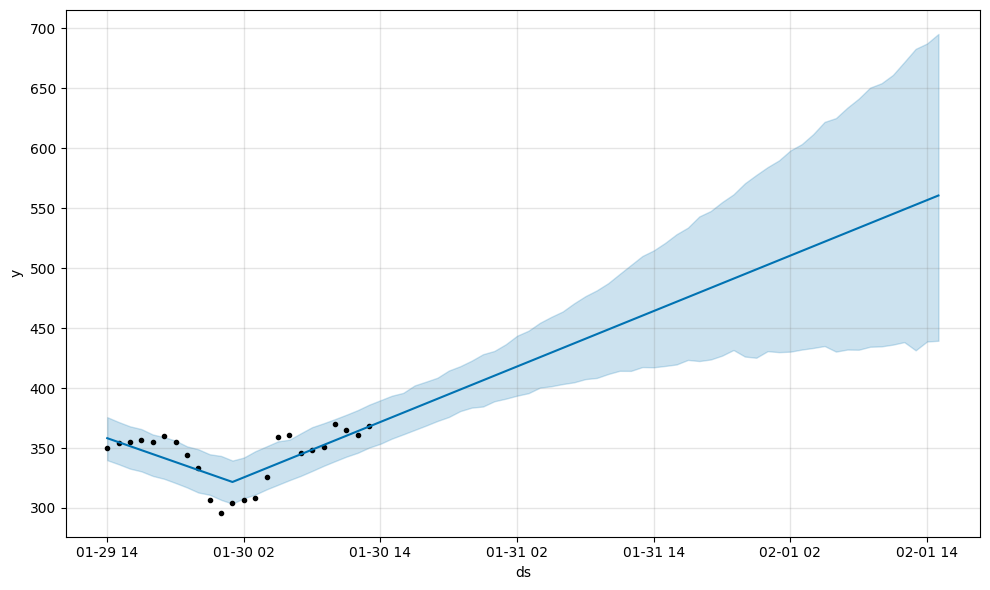

In [99]:
forecast = model.predict(future)
fig = model.plot(forecast)